All the flat files provided with data are combined in one file called allData.dat and read using pandas. Comments are ignored and objects are converted to numeric value using to_numeric method. <null> object gets converted to np.nan and other string values to float.

The following code is used in generating pandas profiling from dataframes.
```
from pandas_profiling import ProfileReport
profile_2 = ProfileReport(df, title="Pandas Profiling Report after Pre-Processing")
profile_2.to_widgets()
```
These can be found here:


*   Before performing pre-processing: https://abbhutto.com/eda01
*   After performing pre-processing: https://abbhutto.com/eda02





In [72]:
import pandas as pd
import numpy as np
column_dfIndex = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'Class']
df = pd.read_csv ('allData.dat', comment='@', names = column_dfIndex)
df = df.apply(pd.to_numeric, errors='coerce')

Prints shape of the data frame and describes a overall view of the data in terms of count, mean, standard deviation, minmum value, percentile (25%, 50%, 75%) and maximum value for each feature.

In [73]:
print(df.shape)
df.describe()

(21755, 10)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,Class
count,19885.000000,19985.000000,19645.000000,19670.000000,19795.000000,19705.000000,19860.000000,19855.000000,19735.000000,21750.000000
mean,48.178024,0.203453,85.626572,1.152211,34.554281,4.123776,37.361027,51.161420,13.789714,1.698851
std,12.528780,35.498976,9.244756,59.042317,22.544475,147.752574,13.645467,23.003543,26.417671,1.351700
min,36.000000,-908.000000,71.000000,-587.000000,-46.000000,-898.000000,-18.000000,-353.000000,-356.000000,1.000000
25%,38.000000,0.000000,78.000000,0.000000,26.000000,-4.000000,31.000000,37.000000,0.000000,1.000000
50%,45.000000,0.000000,83.000000,0.000000,42.000000,0.000000,39.000000,44.000000,2.000000,1.000000
75%,55.000000,0.000000,90.000000,0.000000,46.000000,5.000000,42.000000,62.000000,14.000000,1.000000
max,123.000000,1409.000000,113.000000,2565.000000,436.000000,6339.000000,72.000000,130.000000,126.000000,5.000000


Shows the duplicate observations present in the data frame.

In [74]:
df_duplicate = df[df.duplicated()]
df_duplicate

,A1,A2,A3,A4,A5,A6,A7,A8,A9,Class
1183,37.0,0.0,76.0,0.0,26.0,NaN,40.0,50.0,10.0,1.0
2175,41.0,1.0,86.0,3.0,42.0,6.0,45.0,45.0,0.0,1.0
2176,50.0,-4.0,83.0,0.0,50.0,0.0,33.0,34.0,2.0,1.0
2177,48.0,1.0,81.0,-1.0,46.0,0.0,33.0,34.0,2.0,1.0
2187,49.0,-4.0,107.0,-1.0,50.0,0.0,58.0,58.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
21750,56.0,0.0,78.0,1.0,44.0,0.0,22.0,34.0,12.0,4.0
21751,55.0,-4.0,78.0,0.0,56.0,30.0,23.0,21.0,0.0,1.0
21752,37.0,0.0,78.0,0.0,-4.0,28.0,41.0,83.0,42.0,1.0
21753,44.0,-4.0,77.0,0.0,44.0,21.0,33.0,33.0,0.0,1.0


Prints rows with null values across all the features.

In [75]:
print(df[df['Class'].isna()])

       A1  A2  A3  A4  A5  A6  A7  A8  A9  Class
21729 NaN NaN NaN NaN NaN NaN NaN NaN NaN    NaN
21732 NaN NaN NaN NaN NaN NaN NaN NaN NaN    NaN
21734 NaN NaN NaN NaN NaN NaN NaN NaN NaN    NaN
21738 NaN NaN NaN NaN NaN NaN NaN NaN NaN    NaN
21745 NaN NaN NaN NaN NaN NaN NaN NaN NaN    NaN


Drops all the duplicate observations and observations with Class value as null. Also resets data frame indexing to make it consistent.

In [76]:
df_without_duplicate = df[(~df.duplicated()) & (~df['Class'].isna())]
df_without_duplicate = df_without_duplicate.reset_index(drop=True)

Prints shape of the data fram after droping the duplicate values and unique values of target Class. Also describes the data frame.

In [77]:
print('Shape of the Data Frame: ',repr(df_without_duplicate.shape))
print('Unique Values in the Class coloumn: ',repr(df_without_duplicate.Class.unique()))
df_without_duplicate.describe()

Shape of the Data Frame:  (11381, 10)
Unique Values in the Class coloumn:  array([1., 4., 5., 3., 2.])


,A1,A2,A3,A4,A5,A6,A7,A8,A9,Class
count,9883.000000,9997.000000,9736.000000,9768.000000,9820.000000,9829.000000,9900.000000,9892.000000,9786.000000,11381.000000
mean,48.312152,0.308693,85.647186,0.939701,34.512627,4.338997,37.219697,51.249090,13.949928,1.707056
std,12.802052,42.783687,9.255452,53.115921,22.480552,149.193657,13.751379,23.080156,26.450759,1.359834
min,36.000000,-908.000000,71.000000,-587.000000,-46.000000,-898.000000,-18.000000,-353.000000,-356.000000,1.000000
25%,38.000000,0.000000,78.000000,0.000000,26.000000,-4.000000,31.000000,37.000000,0.000000,1.000000
50%,45.000000,0.000000,83.000000,0.000000,42.000000,0.000000,39.000000,44.000000,2.000000,1.000000
75%,55.000000,0.000000,90.000000,0.000000,46.000000,5.000000,42.000000,63.000000,16.000000,1.000000
max,123.000000,1409.000000,113.000000,2565.000000,436.000000,6339.000000,72.000000,130.000000,126.000000,5.000000


**Data Imputation**: Scikit learn's KNNImputer library is used to do the KNN imputation as explained in the report. KNNImputer object takes the data frame and imputes missing values with the mean of k nearest neighbors. By default k takes value 5. Returned type is a numpy array.

In [78]:
from sklearn.impute import KNNImputer
knn = KNNImputer()
X_trans = knn.fit_transform(df_without_duplicate)

Numpy array is converted to pandas data frame for further processing.

In [79]:
dfX_trans = pd.DataFrame(data = X_trans, columns = column_dfIndex)

Describes the data frame after imputation.

In [80]:
dfX_trans.describe()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,Class
count,11381.000000,11381.000000,11381.000000,11381.000000,11381.000000,11381.000000,11381.000000,11381.000000,11381.000000,11381.000000
mean,48.315210,0.382128,85.548212,0.800018,34.479501,3.965275,37.242281,51.176926,14.058273,1.707056
std,12.800529,44.703967,9.106756,49.657031,22.543932,139.071294,13.618867,22.674259,26.498791,1.359834
min,36.000000,-908.000000,71.000000,-587.000000,-46.000000,-898.000000,-18.000000,-353.000000,-356.000000,1.000000
25%,38.000000,0.000000,78.000000,0.000000,26.000000,-4.000000,31.800000,37.000000,0.000000,1.000000
50%,45.000000,0.000000,83.000000,0.000000,42.000000,0.000000,39.000000,44.000000,2.000000,1.000000
75%,55.000000,0.000000,89.400000,0.000000,46.000000,5.000000,42.000000,62.000000,16.000000,1.000000
max,123.000000,1409.000000,113.000000,2565.000000,436.000000,6339.000000,72.000000,130.000000,126.000000,5.000000


First 9 features are grouped together in a numpy 2d array and target class is grouped in a numpy 1d array.

In [81]:
npArray = dfX_trans.values
X = npArray[:, :9]
y = npArray[:, 9:].T
y = y.ravel()

Prints the shape of feature array and target array.

In [82]:
print(X.shape)
print(y.shape)

(11381, 9)
(11381,)


**Feature Selection: ** SelectKBest object selects most important features according to the given parameter. f_classif specifies the use of ANOVA f-test while deciding the importance and k determines how many features to select.

Here for every k from [1,10), selectKBest selects best parameters and Decision Tree classifier tries to check the perfomence using those parameters. At last one graph is ploted best k feature vs. f1-score obtained from the decision tree classifier using respective features.

Best  1  Feature:  [1]
Best  2  Feature:  [1 9]
Best  3  Feature:  [1 7 9]
Best  4  Feature:  [1 7 8 9]
Best  5  Feature:  [1 5 7 8 9]
Best  6  Feature:  [1 3 5 7 8 9]
Best  7  Feature:  [1 2 3 5 7 8 9]
Best  8  Feature:  [1 2 3 5 6 7 8 9]
Best  9  Feature:  [1 2 3 4 5 6 7 8 9]


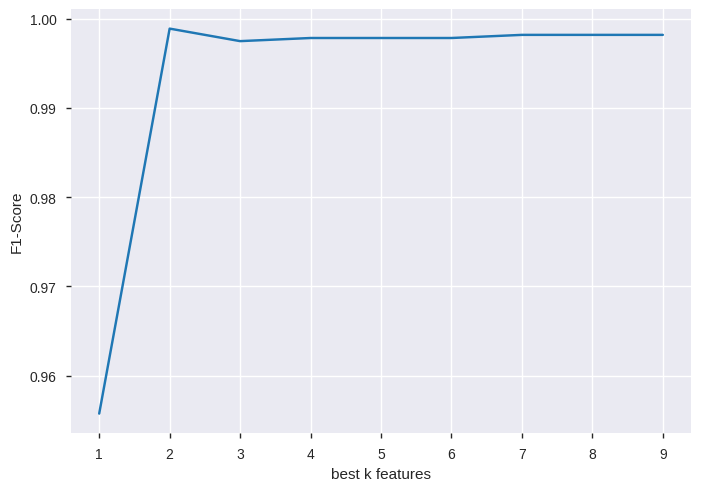

In [83]:
import sklearn.feature_selection as fs
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

f1_list = []
for k in range(1, 10):
    bk = fs.SelectKBest(fs.f_classif, k)
    bk.fit(X,y)
    X_trans = bk.transform(X)
    selected = bk.get_support(indices=True)
    selected += 1
    print("Best ", selected.size, " Feature: ", selected)
    train_x, test_x, train_y, test_y = train_test_split(X_trans, y, random_state=20)
    tr = DecisionTreeClassifier(max_depth=5, random_state = 40)
    tr.fit(train_x, train_y)
    y_pred = tr.predict(test_x)
    f1 = metrics.f1_score(test_y, y_pred, average='micro')
    f1_list.append(f1)

fig, axe = plt.subplots(dpi = 100)
axe.plot(range(1, 10), f1_list)
axe.set_xlabel("best k features")
axe.set_ylabel("F1-Score")
plt.show()

Irrelavent features are droped and described.

In [84]:
finaldf = dfX_trans.drop(['A2', 'A3', 'A4', 'A5', 'A6'], axis = 1)
finaldf.describe()

,A1,A7,A8,A9,Class
count,11381.000000,11381.000000,11381.000000,11381.000000,11381.000000
mean,48.315210,37.242281,51.176926,14.058273,1.707056
std,12.800529,13.618867,22.674259,26.498791,1.359834
min,36.000000,-18.000000,-353.000000,-356.000000,1.000000
25%,38.000000,31.800000,37.000000,0.000000,1.000000
50%,45.000000,39.000000,44.000000,2.000000,1.000000
75%,55.000000,42.000000,62.000000,16.000000,1.000000
max,123.000000,72.000000,130.000000,126.000000,5.000000


Duplicate observations after dropping few features.

In [85]:
finaldf[finaldf.duplicated()]

,A1,A7,A8,A9,Class
43,43.0,37.0,39.0,2.0,1.0
59,37.0,43.0,47.0,4.0,1.0
82,44.0,38.0,38.0,0.0,1.0
88,44.0,42.0,42.0,0.0,1.0
115,44.0,44.0,44.0,0.0,1.0
...,...,...,...,...,...
11376,51.0,37.0,36.0,0.0,1.0
11377,37.0,42.0,70.0,28.0,1.0
11378,37.0,56.0,65.0,8.0,1.0
11379,106.0,1.0,35.0,34.0,5.0


Duplicate observations are dropped and data frame index is reset.

In [86]:
finaldf = finaldf.drop_duplicates()
finaldf = finaldf.reset_index(drop=True)

Print the final data frame set on after all the pre processing.

In [87]:
finaldf

,A1,A7,A8,A9,Class
0,49.0,30.0,32.0,2.0,1.0
1,41.0,45.0,45.0,0.0,1.0
2,50.0,33.0,34.0,2.0,1.0
3,48.0,33.0,34.0,2.0,1.0
4,45.0,39.8,41.2,2.0,1.0
...,...,...,...,...,...
3272,104.0,1.2,35.0,34.0,5.0
3273,49.4,34.0,35.0,2.0,1.0
3274,44.0,38.0,38.4,0.0,1.0
3275,56.0,34.8,47.2,10.0,4.0


Drawing a paitplot for data visiualization to help deciding on what type of classifier should be used.

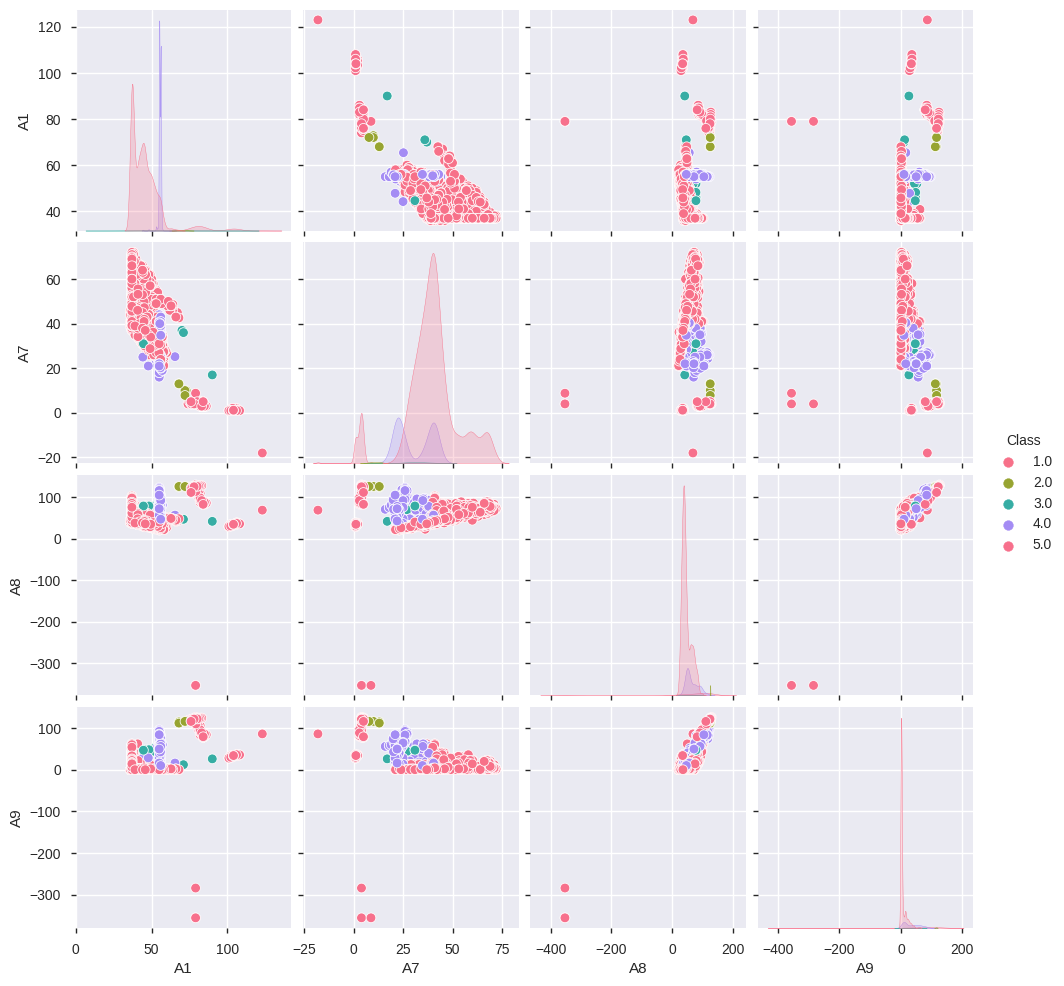

In [88]:
import seaborn as sns
pairplot_fig = sns.pairplot(finaldf, hue="Class", palette = "husl")

First 4 features are grouped together in a numpy 2d array and target class is grouped in a numpy 1d array.

In [92]:
npArray = finaldf.values
X = npArray[:, :4]
y = npArray[:, 4:].T
y = y.ravel()

Prints the shape of feature array and target array.

In [93]:
print(X.shape)
print(y.shape)

(3277, 4)
(3277,)


Split Data:
      train_test_split splits the data into two sets training and testing. In it's default configuration spliting is dont in 75:25 ratio. Stratify = y, makes sure the presence of all classes in training as well as testing set. This is done due to the Imbalance nature of the data set.

Learning Model: XGBoost
      XGBClassifier takes lot of parameters, but here three parameters are considered. objective is a learning task parameter and it specify corresponding learning objective. Here multiclass classification using softmax is used. Sample_weight takes an array of length equal to the number of training observation and value of corresponding weight associated with the class.

Class Weight: 
      compute_class_weight computes the weight corresponding to different classes. In case of 'balanced', class weights are given by, weights = total_samples / (n_classes * np.bincount(y))

Cross Validation:
      A common scikit-learn object used with XGBoost models is the GridSearchCV wrapper. In the code below, grid search cross-validation is applied to a multi class classification XGBoost model to find the optimal 'max_depth' parameter (in the range from 2 to 4, inclusive). The K-fold cross-validation (the default for grid search) uses 4 folds.
      After calling fit on data and labels, cv_model represents the cross-validated classification model trained on the dataset. The grid search cross-validation automatically chose the best performing 'max_depth' parameter. The best_params_ attribute contains the best performing hyperparameters after cross-validation.

Best max_depth is printed.

In [111]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix

train_x, test_x, train_y, test_y = train_test_split(X, y, stratify=y)

class_weights = class_weight.compute_class_weight('balanced',
                                                   np.unique(train_y),
                                                   train_y)

w_array = np.ones(train_y.shape[0], dtype='float')
for i, val in enumerate(train_y):
    w_array[i] = class_weights[int(val-1)]

model = xgb.XGBClassifier(objective='multi:softmax', sample_weight=w_array)
params = {'max_depth': range(2,5)}

cv_model = GridSearchCV(model, params, cv=4)
cv_model.fit(train_x, train_y)

print('Best max_depth: {}\n'.format(cv_model.best_params_['max_depth']))
best_max_depth = cv_model.best_params_['max_depth']

predicted_train = cv_model.predict(train_x)
predicted_test = cv_model.predict(test_x)
report_on_train = classification_report(train_y, predicted_train)
report_on_test = classification_report(test_y, predicted_test)

Best max_depth: 4



Split test scores are printed for cross validation.

In [112]:
df_cv_results = df.from_dict(cv_model.cv_results_)
df_cv_results[['params', 'split0_test_score', 'split1_test_score','split2_test_score', 'split3_test_score']]

,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score
0,{'max_depth': 2},0.998374,0.995114,0.996743,0.995114
1,{'max_depth': 3},0.998374,0.995114,0.996743,0.995114
2,{'max_depth': 4},0.998374,0.995114,0.996743,0.996743


Test Scores against the validation set and rank for different max_depth is printed.

In [113]:
df_cv_results = df.from_dict(cv_model.cv_results_)
df_cv_results[['params', 'rank_test_score', 'mean_test_score','std_test_score']]

,params,rank_test_score,mean_test_score,std_test_score
0,{'max_depth': 2},2,0.996336,0.001351
1,{'max_depth': 3},2,0.996336,0.001351
2,{'max_depth': 4},1,0.996743,0.001153


Validation matrics for training set is shown (Confusion matrix, precision, recall, f1-score, support, accuracy, macro and weighted avg)

In [114]:
print("Classification Report of Training Set: \n")
print("Confusion Matrix: ")
print(confusion_matrix(test_y, predicted_test), '\n')
print(report_on_train)

Classification Report of Training Set: 

Confusion Matrix: 
[[653   0   1   1   0]
 [  0   1   0   1   0]
 [  1   0   2   0   0]
 [  1   0   0 124   0]
 [  0   0   0   0  35]] 

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00      1964
         2.0       1.00      1.00      1.00         4
         3.0       1.00      1.00      1.00         7
         4.0       1.00      1.00      1.00       376
         5.0       1.00      1.00      1.00       106

    accuracy                           1.00      2457
   macro avg       1.00      1.00      1.00      2457
weighted avg       1.00      1.00      1.00      2457



Validation matrics for testing set is shown (Confusion matrix, precision, recall, f1-score, support, accuracy, macro and weighted avg)

In [115]:
print("Classification Report of Test Set: \n")
print("Confusion Matrix: ")
print(confusion_matrix(train_y, predicted_train),"\n")
print(report_on_test)

Classification Report of Test Set: 

Confusion Matrix: 
[[1964    0    0    0    0]
 [   0    4    0    0    0]
 [   0    0    7    0    0]
 [   0    0    0  376    0]
 [   0    0    0    0  106]] 

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       655
         2.0       1.00      0.50      0.67         2
         3.0       0.67      0.67      0.67         3
         4.0       0.98      0.99      0.99       125
         5.0       1.00      1.00      1.00        35

    accuracy                           0.99       820
   macro avg       0.93      0.83      0.86       820
weighted avg       0.99      0.99      0.99       820

